# 🧪 Beginner Notebook – FairFrame Challenge

This notebook provides a basic example of exploratory analysis of synthetic loan data. You need to build on it. 
Your goal is to identify potential group-level disparities (e.g., based on gender, caste, or religion) in loan approvals.


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data/loan_data.csv")
df.head()


,user_id,gender,caste,religion,age,income,accent_score,credit_history_score,number_of_loans,savings_balance,years_with_bank,loan_score,approved
0,U000,Male,SC/ST,Other,41,65247,54.84,739.0,2,47828,7,65.97,1
1,U001,Female,OBC,Hindu,52,92752,96.98,707.6,2,48924,17,55.00,0
2,U002,Male,SC/ST,Hindu,43,86573,77.37,638.4,0,75182,7,71.31,1
3,U003,Male,SC/ST,Hindu,53,89101,63.78,709.5,1,94065,14,89.54,1
4,U004,Male,OBC,Other,23,56646,64.51,770.0,2,60052,15,71.09,1


In [11]:
# Basic Overview
df.describe(include='all')
df['approved'].value_counts(normalize=True)


approved
1    0.81
0    0.19
Name: proportion, dtype: float64

In [12]:
# Group-Level Approval Rates
group_cols = ['gender', 'caste', 'religion']
for col in group_cols:
    print(f"\nApproval rate by {col}")
    print(df.groupby(col)['approved'].mean())



Approval rate by gender
gender
Female    0.767857
Male      0.863636
Name: approved, dtype: float64

Approval rate by caste
caste
General    0.884615
OBC        0.840000
SC/ST      0.608696
Name: approved, dtype: float64

Approval rate by religion
religion
Christian    0.900000
Hindu        0.773585
Muslim       0.800000
Other        0.916667
Name: approved, dtype: float64


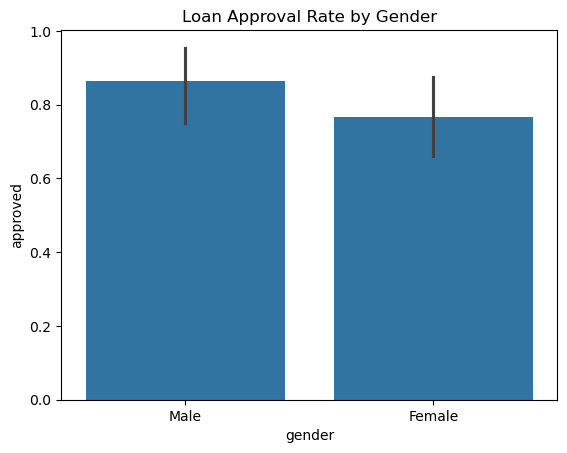

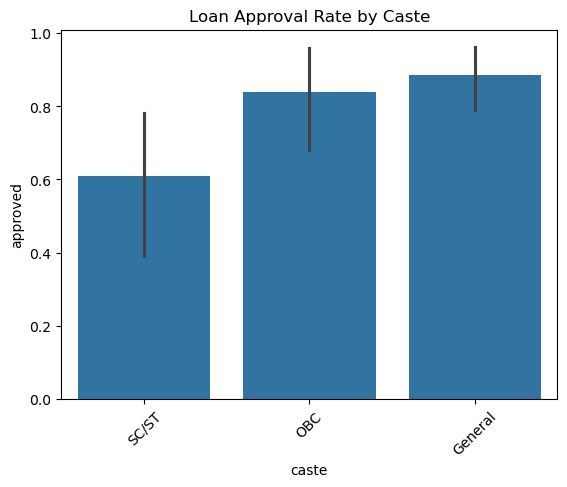

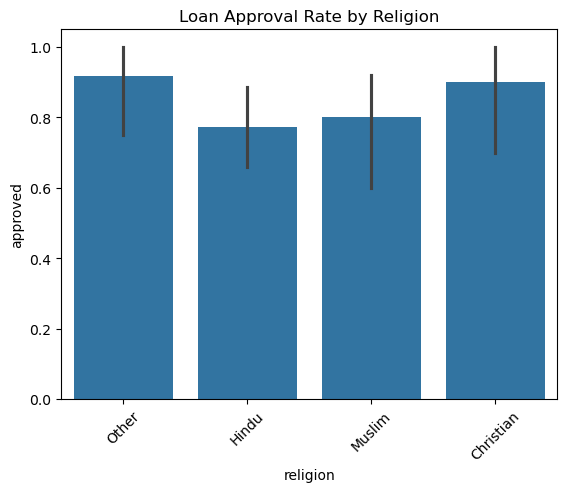

In [13]:
# Visualizations
sns.barplot(x='gender', y='approved', data=df)
plt.title("Loan Approval Rate by Gender")
plt.show()

sns.barplot(x='caste', y='approved', data=df)
plt.title("Loan Approval Rate by Caste")
plt.xticks(rotation=45)
plt.show()

sns.barplot(x='religion', y='approved', data=df)
plt.title("Loan Approval Rate by Religion")
plt.xticks(rotation=45)
plt.show()


### Correlation Heatmap of Numeric Features

📝 Purpose: Shows relationships between neutral and protected features (e.g., loan_score vs savings_balance).

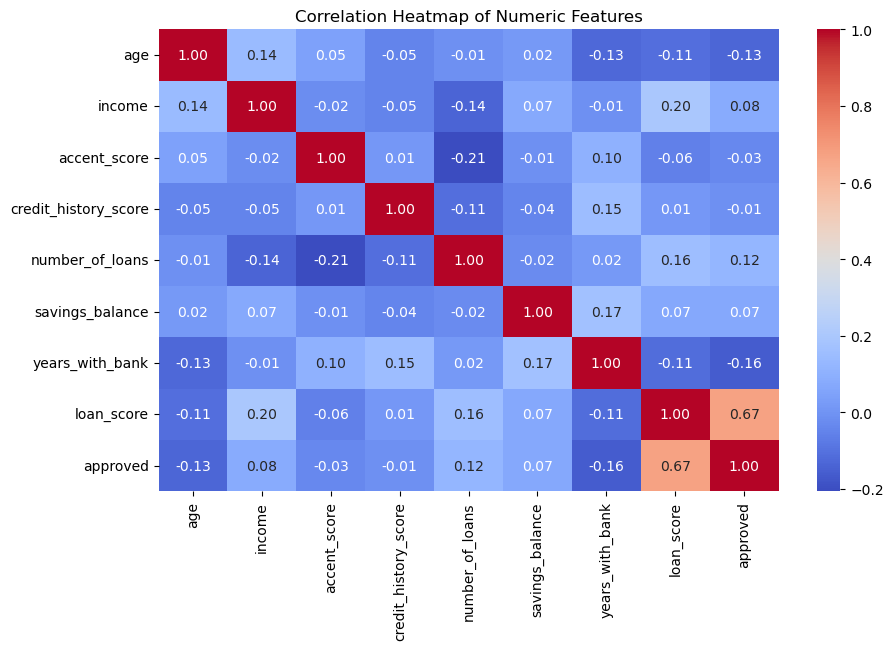

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include='number')

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


### Loan Score vs. Savings Balance

📝 Purpose: Explore whether loan scores vary with a neutral feature and if there's any interaction with protected attributes.


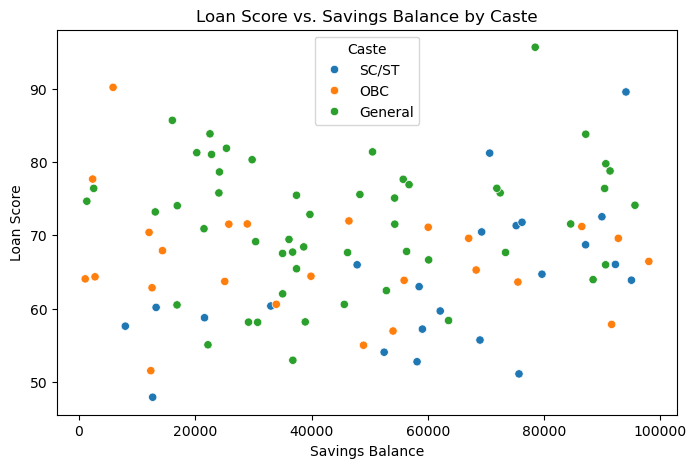

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='savings_balance', y='loan_score', hue='caste')
plt.title('Loan Score vs. Savings Balance by Caste')
plt.xlabel('Savings Balance')
plt.ylabel('Loan Score')
plt.legend(title='Caste')
plt.show()


### Boxplot of Credit History Score by Approval

📝 Purpose: Understand how a neutral metric (credit history) aligns with final decisions.

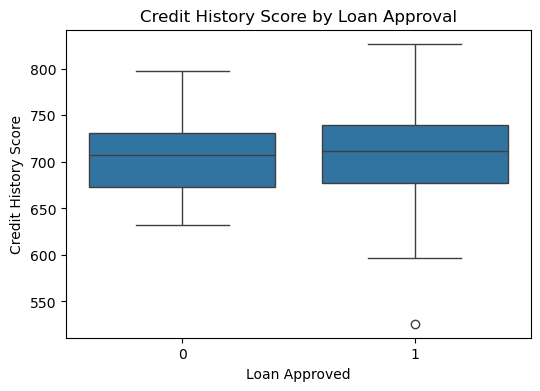

In [20]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='approved', y='credit_history_score')
plt.title('Credit History Score by Loan Approval')
plt.xlabel('Loan Approved')
plt.ylabel('Credit History Score')
plt.show()


### Optional: Disparate Impact Ratio (Gender)

In [14]:
approval_rate = df.groupby('gender')['approved'].mean()
di_ratio = approval_rate.min() / approval_rate.max()
print(f"Disparate Impact Ratio (Sex): {di_ratio:.2f}")


Disparate Impact Ratio (Sex): 0.89


# ✍️ Summary

In your final submission, briefly summarize:

- Which group(s) appeared to have lower approval rates?
- Are there any group disparities that could indicate unfair bias?
- What further data would help you clarify your findings?

This analysis is intended as a first step toward identifying potential fairness concerns in the loan approval system.
